# Imports

In [1]:
from common import Common
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import sys
import statistics
import _pickle as pickle
import collections
import re
import operator
%matplotlib inline

# BPE Model Performance

In [13]:
def render_bpe_comparison():
    f = plt.figure()
    X = [39.11,38.55,36.26,33.53]
    Y = [14.71,12.20,11.16,10.47]
    Z = [41.75,41.11,41.71,38.91]
    A = [19.98,18.82,20.24,16.37]
    plt.xticks([0,1,2,3], ('1k', '2k', '5k', '10k'))
# Plotting functionality starts here

    plt.plot(Z, marker='o', label="Case Insensitive UNK")

    plt.plot(X, marker='o', label="Case Sensitive UNK")

    plt.plot([43.56,43.56,43.56,43.56], label="Baseline (no BPE)")

    plt.plot([42.896,42.896,42.896,42.896], label="Reduced Vocab UNK")
# Add legend
    plt.legend(loc='best')
# Add title and x, y labels
    plt.title("BPE Merges Performance", fontsize=16, fontweight='bold')
#plt.suptitle("Random Walk Suptitle", fontsize=10)
    plt.xlabel("Merges")
    plt.ylabel("F1")
    plt.show()
    f.savefig("figures/bpe_perf_unk.pdf", bbox_inches='tight')
    
    f = plt.figure()
    X = [39.11,38.55,36.26,33.53]
    Y = [14.71,12.20,11.16,10.47]
    Z = [41.75,41.11,41.71,38.91]
    A = [19.98,18.82,20.24,16.37]
    plt.xticks([0,1,2,3], ('1k', '2k', '5k', '10k'))
# Plotting functionality starts here


    plt.plot(A, marker='o', label="Case Insensitive nUNK")

    plt.plot(Y, marker='o', label="Case Sensitive nUNK")
    plt.plot([22.517,22.517,22.517,22.517], label="Baseline nUNK")
    plt.plot([19.8986,19.8986,19.8986,19.8986], label="Reduced Vocab nUNK")
# Add legend
    plt.legend(loc='best')
# Add title and x, y labels
    plt.title("BPE Merges Performance", fontsize=16, fontweight='bold')
#plt.suptitle("Random Walk Suptitle", fontsize=10)
    plt.xlabel("Merges")
    plt.ylabel("F1")
    plt.show()
    f.savefig("figures/bpe_perf_nunk.pdf", bbox_inches='tight')

# Parts Distribution

In [44]:
def load_raw_dataset_counts(input_filename):
    counts = []
    with open(input_filename) as fp:
        for line in fp:
            line = line.rstrip()
            split_line = line.split(" ")
            split_target = split_line[0].split("|")
            if(len(split_target) > 70):
                print(split_target)
            counts.append(len(split_target))
    return counts

def render_parts_distribution(dataset_name, path):
    counts = load_raw_dataset_counts(path)
    print("Data set: ", dataset_name)
    print("Max Part length: ", max(counts))
    print("Avg part length: ", sum(counts)/len(counts))
    print("Min part length: ", min(counts))
    print("Median part length: ", statistics.median(counts))
    
    # fixed bin size
    bins = np.arange(0, 25, 0.5) # fixed bin size
    f = plt.figure()
    plt.xlim([1, 25]) #max(counts)

    plt.hist(counts, bins=bins, alpha=0.5)
    plt.title('Distribution of part lengths')
    plt.xlabel('Number of parts')
    plt.ylabel('Count')

    #plt.show()
    f.savefig("figures/parts_distribution_{}.pdf".format(dataset_name), bbox_inches='tight')

# Vocabulary Analysis

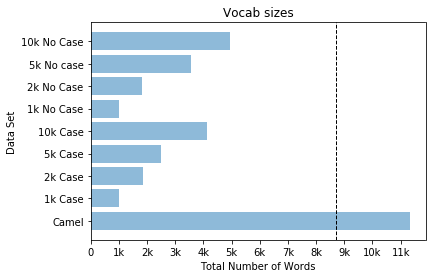

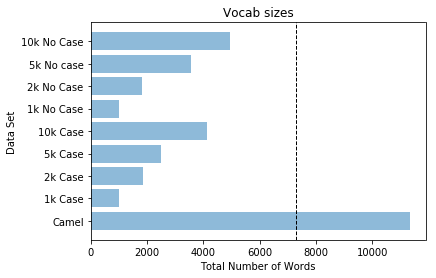

In [105]:
def plot_word_frequency(words, tokens, title):
    sorted_doc = (sorted(tokens.items(), key=operator.itemgetter(1)))[::-1]
    just_the_occur = []
    just_the_rank = []
    word_rank = []
    word_frequency = []
    entry_num = 1
    for entry in sorted_doc:
        if (entry[0] in words):
            word_rank.append(entry_num)
            word_frequency.append(entry[1])

        just_the_rank.append(entry_num)
        entry_num += 1
        just_the_occur.append(entry[1])
    f = plt.figure()
    plt.title("Word Frequencies in " + title)
    plt.ylabel("Total Number of Occurrences")
    plt.xlabel("Rank of word")# (\"" + word + "\" is rank " + str(word_rank) + ")")
    plt.loglog(just_the_rank, just_the_occur, basex=10)
    plt.scatter(
        word_rank,
        word_frequency,
        color="orange",
        marker="o",
        s=100,
        label=words
    )
    #plt.show()
    f.savefig("figures/word_" + words[0] + title + ".pdf", bbox_inches='tight')
    
def load_dataset_dictionary(name):
    with open("{}.dict.c2s".format(name), "rb") as file:
        subtoken_to_count = pickle.load(file)
        node_to_count = pickle.load(file)
        target_to_count = pickle.load(file)
        max_contexts = pickle.load(file)
        num_training_examples = pickle.load(file)
        return target_to_count, subtoken_to_count, max_contexts, num_training_examples
    
def create_vocab_dataframe(vocab):
    return pd.DataFrame(vocab.items(), columns=["Word","Frequency"])

def df_freq_lt(df, freq):
    return df[df.Frequency<freq]

def plot_occurences(objects, dataframes, freq):
    vectors = [len(df_freq_lt(df, freq)) for df in dataframes]
    y_pos = np.arange(len(objects))
    f = plt.figure()
    plt.bar(y_pos, vectors, align='center', alpha=0.5)
    plt.title("Number of words with occurences less than " + str(freq))
    plt.ylabel("Total Number of Occurrences")
    plt.xticks(y_pos, objects)

    #plt.show()
    f.savefig("figures/occurences_{}.pdf".format(objects[0]), bbox_inches='tight')
def plot_vocab_sizes():
    camel, cameli, _, _ = load_dataset_dictionary("data/java-small/java-small")
    case_1k, case_1ki, _, _ = load_dataset_dictionary("data/java-small-case-1k/java-small-case-1k")
    case_2k, case_2ki, _, _ = load_dataset_dictionary("data/java-small-case-2k/java-small-case-2k")
    case_5k, case_5ki, _, _ = load_dataset_dictionary("data/java-small-case-5k/java-small-case-5k")
    case_10k, case_10ki, _, _ = load_dataset_dictionary("data/java-small-case-10k/java-small-case-10k")
    nocase_1k, nocase_1ki, _, _ = load_dataset_dictionary("data/java-small-nocase-1k/java-small-nocase-1k")
    nocase_2k, nocase_2ki, _, _ = load_dataset_dictionary("data/java-small-nocase-2k/java-small-nocase-2k")
    nocase_5k, nocase_5ki, _, _ = load_dataset_dictionary("data/java-small-nocase-5k/java-small-nocase-5k")
    nocase_10k, nocase_10ki, _, _ = load_dataset_dictionary("data/java-small-nocase-10k/java-small-nocase-10k")
    
    f = plt.figure()
    plt.title("Vocab sizes")
    plt.xlabel("Total Number of Words")
    plt.ylabel("Data Set")
    plt.axvline(8700,linewidth=1, color='k', ls="--")
    plt.xticks(np.arange(0,13000,1000), ["0","1k","2k","3k","4k","5k","6k","7k","8k","9k","10k","11k", "12k"])
    sizes = [len(camel), len(case_1k), len(case_2k), len(case_5k), len(case_10k), len(nocase_1k), len(nocase_2k), len(nocase_5k), len(nocase_10k)]
    plt.barh(("Camel","1k Case", "2k Case","5k Case", "10k Case", "1k No Case", "2k No Case", "5k No case", "10k No Case"), sizes, align='center', alpha=0.5)
#     plt.show()
    f.savefig("figures/target_vocab_sizes.pdf", bbox_inches='tight')
    
    f = plt.figure()
    plt.title("Vocab sizes")
    plt.xlabel("Total Number of Words")
    plt.ylabel("Data Set")
    plt.axvline(7300,linewidth=1, color='k', ls="--")
    plt.barh(("Camel","1k Case", "2k Case","5k Case", "10k Case", "1k No Case", "2k No Case", "5k No case", "10k No Case"), sizes, align='center', alpha=0.5)
#     plt.show()
    f.savefig("figures/source_vocab_sizes.pdf", bbox_inches='tight')
plot_vocab_sizes()

In [5]:
target_tokens, source_subtokens, max_contexts, num_training_examples = load_dataset_dictionary("data/java-small/java-small")
target_df = create_vocab_dataframe(target_tokens)
source_df = create_vocab_dataframe(source_subtokens)

In [ ]:
source_df.iloc[::-1]

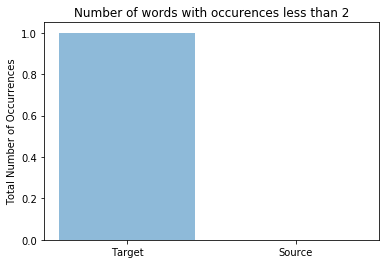

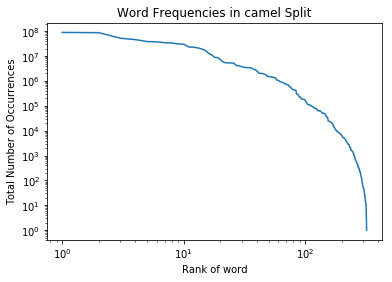

In [7]:
plot_occurences(("Target","Source"), [target_df, source_df], 2)
plot_word_frequency(["return"], target_tokens, "camel Split")

## True vocab size of source and target tokens, capped size
## Number of rare words
## Number of words lost by cap
## word frequency by dataset
## Min, max, avg part length

## Java-small, med, large, bpe 1k, 2k, 5k, 10k, case, no case

java-small
config.SUBTOKENS_VOCAB_MAX_SIZE = 7300
config.TARGET_VOCAB_MAX_SIZE = 8700

java-med (presumed)
config.SUBTOKENS_VOCAB_MAX_SIZE = 190000
config.TARGET_VOCAB_MAX_SIZE = 27000

java-large (presumed)
config.SUBTOKENS_VOCAB_MAX_SIZE = 190000
config.TARGET_VOCAB_MAX_SIZE = 27000

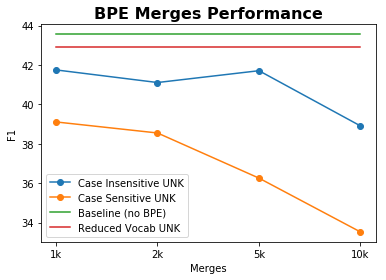

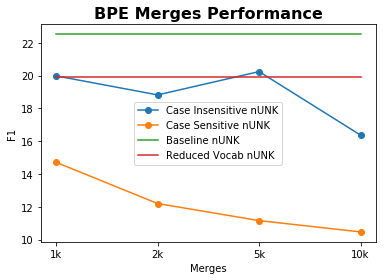

In [14]:
render_bpe_comparison()

Data set:  Pico BPE
Max Part length:  36
Avg part length:  5.167778836987607
Min part length:  1
Median part length:  4


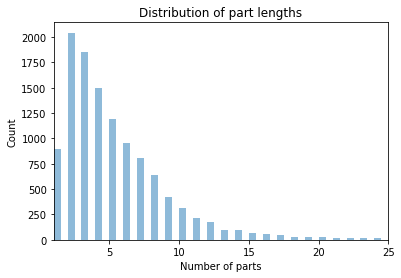

In [43]:
render_parts_distribution("Pico BPE", "preprocessing/java-pico-test-target-only.train.raw.txt.bpe.full.txt")

Data set:  java-small 1K Case
Max Part length:  98
Avg part length:  5.137257706743816
Min part length:  1
Median part length:  4


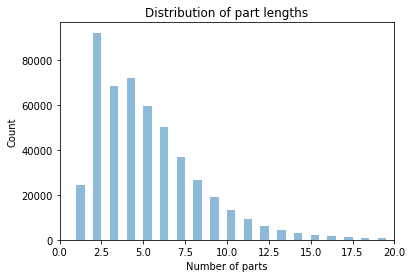

In [38]:
render_parts_distribution("java-small 1K Case", "data/java-small-case-1k/java-small-case-1k.train.c2s")

['me', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'et', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 'th', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'oo', 'oo', 'oo', 'oo', 'oo', 'oo', 'oo', 'od', 'd', 'd', 'd', 'd', 'd']
Data set:  java-small 2K Case
Max Part length:  97
Avg part length:  4.124645664056283
Min part length:  1
Median part length:  3


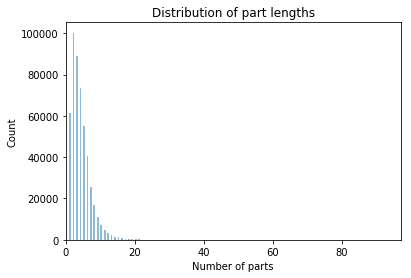

In [28]:
render_parts_distribution("java-small 2K Case", "data/java-small-case-2k/java-small-case-2k.train.c2s")

Data set:  java-small 5K Case
Max Part length:  74
Avg part length:  3.794762174348395
Min part length:  1
Median part length:  3


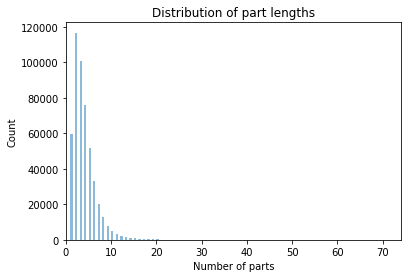

In [29]:
render_parts_distribution("java-small 5K Case", "data/java-small-case-5k/java-small-case-5k.train.c2s")

['me', 'ee', 'ee', 'ee', 'ee', 'ee', 'ee', 'ee', 'ee', 'ee', 'ee', 'ee', 'eet', 'tt', 'tt', 'tt', 'tt', 'tt', 'tt', 'tt', 'tt', 'tt', 'tt', 'tt', 'th', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'oo', 'oo', 'oo', 'oo', 'oo', 'oo', 'oo', 'od', 'dd', 'dd', 'd']
Data set:  java-small 10K Case
Max Part length:  72
Avg part length:  3.2659509097392774
Min part length:  1
Median part length:  3


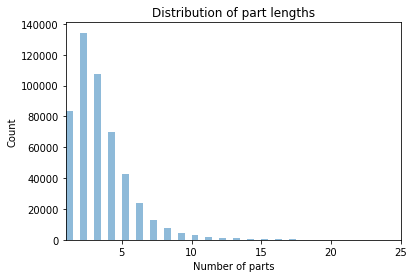

In [45]:
render_parts_distribution("java-small 10K Case", "data/java-small-case-10k/java-small-case-10k.train.c2s")

Data set:  java-small No BPE
Max Part length:  38
Avg part length:  2.914881194958192
Min part length:  1
Median part length:  3.0


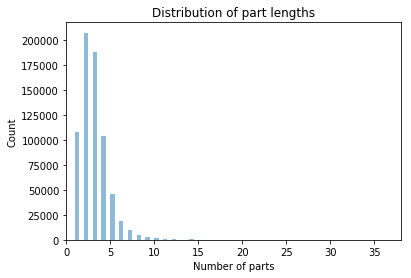

In [31]:
render_parts_distribution("java-small No BPE", "data/java-small/java-small.train.c2s")

['test', 'R', 'an', 'ge', 'M', 'ar', 'ker', 's', 'D', 'o', 'N', 'ot', 'G', 'et', 'A', 'd', 'ded', 'O', 'r', 'R', 'e', 'mo', 'ved', 'W', 'h', 'en', 'U', 'ser', 'I', 's', 'J', 'ust', 'T', 'y', 'p', 'ing', 'I', 'n', 'si', 'de', 'H', 'ig', 'h', 'li', 'g', 'h', 'ted', 'R', 'e', 'gi', 'on', 'A', 'n', 'd', 'E', 'speci', 'all', 'y', 'I', 'n', 'si', 'de', 'I', 'n', 'j', 'ected', 'F', 'r', 'ag', 'ment', 's', 'W', 'h', 'i', 'ch', 'A', 're', 'C', 'o', 'lo', 're', 'd', 'G', 're', 'en', 'A', 'n', 'd', 'U', 'ser', 's', 'C', 'o', 'mp', 'la', 'in', 'E', 'n', 'd', 'less', 'ly', 'T', 'h', 'at', 'E', 'd', 'itor', 'F', 'lic', 'ker', 's', 'T', 'her', 'e']
['test', 'S', 't', 'ress', 'F', 'or', 'H', 'or', 'ri', 'ble', 'A', 'B', 'A', 'P', 'ro', 'ble', 'm', 'W', 'h', 'en', 'F', 'ir', 'st', 'T', 'h', 'read', 'F', 'in', 'is', 'h', 'es', 'T', 'ask', 'A', 'n', 'd', 'I', 's', 'A', 'b', 'out', 'T', 'o', 'D', 'ec', 're', 'ment', 'C', 'o', 'un', 't', 'A', 'n', 'd', 'S', 'e', 'con', 'd', 'T', 'h', 'read', 'I', 'n', 'cre

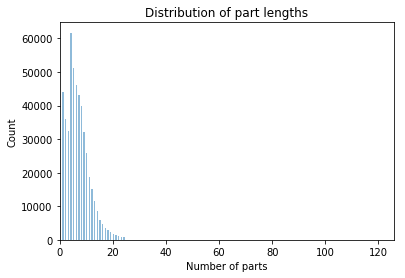

In [32]:
render_parts_distribution("java-small 1K No Case", "data/java-small-nocase-1k/java-small-nocase-1k.train.c2s")

['test', 'R', 'an', 'ge', 'M', 'ar', 'ker', 's', 'D', 'o', 'N', 'ot', 'G', 'et', 'A', 'd', 'ded', 'O', 'r', 'R', 'e', 'mo', 'ved', 'W', 'h', 'en', 'U', 'ser', 'I', 's', 'J', 'ust', 'T', 'y', 'ping', 'I', 'n', 'side', 'H', 'igh', 'li', 'gh', 'ted', 'R', 'e', 'gi', 'on', 'A', 'n', 'd', 'E', 'speci', 'ally', 'I', 'n', 'side', 'I', 'n', 'j', 'ected', 'F', 'r', 'ag', 'ments', 'W', 'hi', 'ch', 'A', 're', 'C', 'o', 'lo', 'red', 'G', 're', 'en', 'A', 'n', 'd', 'U', 'ser', 's', 'C', 'o', 'mp', 'la', 'in', 'E', 'n', 'd', 'less', 'ly', 'T', 'h', 'at', 'E', 'd', 'itor', 'F', 'lic', 'ker', 's', 'T', 'here']
['test', 'S', 't', 'ress', 'F', 'or', 'H', 'or', 'ri', 'ble', 'A', 'B', 'A', 'P', 'ro', 'ble', 'm', 'W', 'h', 'en', 'F', 'ir', 'st', 'T', 'h', 'read', 'F', 'in', 'ish', 'es', 'T', 'ask', 'A', 'n', 'd', 'I', 's', 'A', 'b', 'out', 'T', 'o', 'D', 'ec', 're', 'ment', 'C', 'o', 'unt', 'A', 'n', 'd', 'S', 'e', 'con', 'd', 'T', 'h', 'read', 'I', 'n', 'cre', 'ments', 'C', 'o', 'un', 'ter', 'T', 'o', 'T'

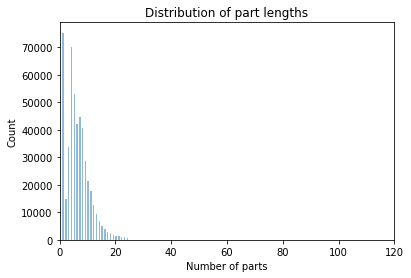

In [33]:
render_parts_distribution("java-small 2K No Case", "data/java-small-nocase-2k/java-small-nocase-2k.train.c2s")

['test', 'R', 'an', 'ge', 'M', 'ar', 'ker', 's', 'D', 'o', 'N', 'ot', 'G', 'et', 'A', 'd', 'ded', 'O', 'r', 'R', 'e', 'moved', 'W', 'hen', 'U', 'ser', 'I', 's', 'J', 'ust', 'T', 'y', 'ping', 'I', 'n', 'side', 'H', 'igh', 'ligh', 'ted', 'R', 'e', 'gi', 'on', 'A', 'nd', 'E', 'speci', 'ally', 'I', 'n', 'side', 'I', 'n', 'j', 'ected', 'F', 'r', 'ag', 'ments', 'W', 'hi', 'ch', 'A', 're', 'C', 'o', 'lo', 'red', 'G', 're', 'en', 'A', 'nd', 'U', 'ser', 's', 'C', 'o', 'mp', 'la', 'in', 'E', 'nd', 'less', 'ly', 'T', 'hat', 'E', 'd', 'itor', 'F', 'lic', 'ker', 's', 'T', 'here']
['test', 'S', 't', 'ress', 'F', 'or', 'H', 'or', 'ri', 'ble', 'A', 'B', 'A', 'P', 'ro', 'ble', 'm', 'W', 'hen', 'F', 'ir', 'st', 'T', 'h', 'read', 'F', 'in', 'ish', 'es', 'T', 'ask', 'A', 'nd', 'I', 's', 'A', 'b', 'out', 'T', 'o', 'D', 'ec', 're', 'ment', 'C', 'o', 'unt', 'A', 'nd', 'S', 'e', 'cond', 'T', 'h', 'read', 'I', 'n', 'cre', 'ments', 'C', 'o', 'un', 'ter', 'T', 'o', 'T', 'wo', 'T', 'hen', 'S', 'k', 'ip', 's', 'E'

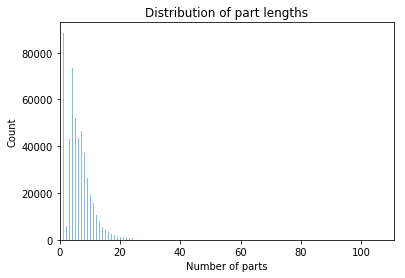

In [34]:
render_parts_distribution("java-small 5K No Case", "data/java-small-nocase-5k/java-small-nocase-5k.train.c2s")

['test', 'S', 't', 'ress', 'F', 'or', 'H', 'or', 'ri', 'ble', 'A', 'B', 'A', 'P', 'ro', 'ble', 'm', 'W', 'hen', 'F', 'irst', 'T', 'h', 'read', 'F', 'in', 'ish', 'es', 'T', 'ask', 'A', 'nd', 'I', 's', 'A', 'b', 'out', 'T', 'o', 'D', 'ec', 're', 'ment', 'C', 'o', 'unt', 'A', 'nd', 'S', 'e', 'cond', 'T', 'h', 'read', 'I', 'n', 'cre', 'ments', 'C', 'o', 'un', 'ter', 'T', 'o', 'T', 'wo', 'T', 'hen', 'S', 'k', 'ips', 'E', 'x', 'ec', 'ution', 'T', 'hen', 'D', 'ec', 're', 'ments', 'I', 't', 'B', 'ack', 'A', 'nd', 'T', 'he', 'F', 'irst', 'T', 'h', 'read', 'F', 'in', 'ished', 'D', 'ec', 're', 'ment', 'ing', 'S', 'uc', 'cess', 'fully']
Data set:  java-small 10K No Case
Max Part length:  106
Avg part length:  5.801094386835123
Min part length:  1
Median part length:  5


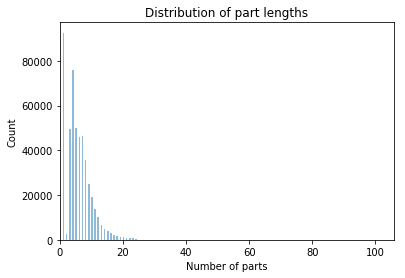

In [36]:
render_parts_distribution("java-small 10K No Case", "data/java-small-nocase-10k/java-small-nocase-10k.train.c2s")